## Code Submitted by: Chirag Verma

Given: $$\dot{x} = v_{const} + \frac{\sigma}{\gamma}\xi(t)$$
where $v_{const}$ is a constant velocity term, $\gamma$ is the friction coefficient, $\sigma$ is the noise strength, and $\xi(t)$ is white noise <br>

To Plot: <br>
i. Trajectories as a function of time <br>
         ii. Mean squared displacement as a function of time

In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Defining necessary variables

constVel = 0.5
gamma = 0.35
sigma = 0.3
diffCoeff = (sigma/gamma)**2
tau = 2*diffCoeff/(constVel**2)

# Implementing Euler-Maruyama algorithm for constant velocity

def em_step(t, y, dt, f, G):
    
    DW = np.random.normal(size=len(y))    
    return y + f(t,y)*dt + np.dot(G(t,y), DW) * np.sqrt(dt)


def eulermaruyama(t_list, y0, dt_max, f, G):
    y_list = np.zeros((len(t_list), len(y0))) # List of results
    
    t = 0 # Current simulation time
    y = y0
    
    for i, T in enumerate(t_list):
        
        while(t < T):            
            # Determine time step. Either dt_max, or shorter to
            # hit the next output point.
            dt = min(T-t, dt_max)
            y = em_step(t, y, dt, f, G)
            t += dt
            
        y_list[i,:] = y
        
    return y_list

def f(t,y):
    return constVel

def G(t,y):
    return sigma/gamma

In [3]:
# Choosing an ensemble size of 1000
nEnsemble = 1000

# Each walker starts at the origin
y0 = np.zeros(nEnsemble)

# Time domain of calculation
tStart = 0.1
tEnd = 50
t = np.linspace(tStart, tEnd, 100)

dt = 1e-3

# Solving the system
sol = []

sol.append(eulermaruyama(t, y0, dt, f, G))

Text(0.5, 1.0, 'Displacement of every 100th walker')

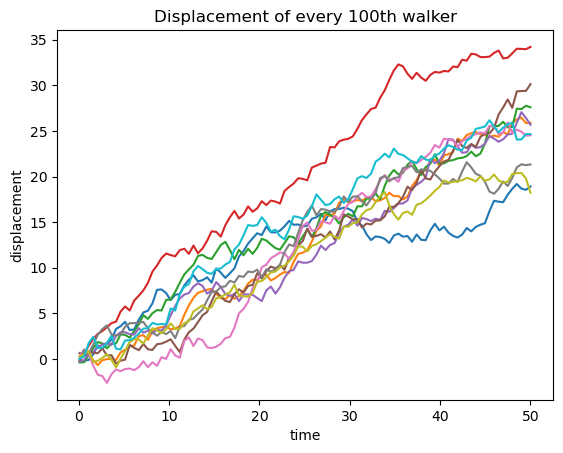

In [4]:
# Plotting the displacements of every 100th walker
plt.plot(t, sol[0][:, 0::100])
plt.ylabel("displacement")
plt.xlabel("time");
plt.title("Displacement of every 100th walker")

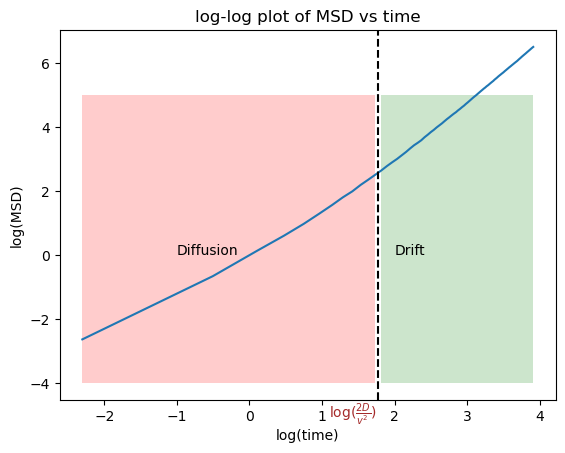

In [5]:
# Calculating the mean square displacement (every walker starts from the origin)
msd = []
msd.append(np.mean(sol[0]**2, axis = 1))

plt.plot(np.log(t), np.log(msd[0]))

plt.axvline(x = np.log(tau), ls = "--", color="k");
plt.text(1.1,-5.1,r'$\log(\frac{2D}{v^2})$', color="brown");

plt.ylabel("log(MSD)")
plt.xlabel("log(time)")

plt.fill_between(np.log(t),-4, 5, where = np.log(t) <= np.log(tau), facecolor='red', alpha=.2)
plt.text(-1,0,"Diffusion");

plt.fill_between(np.log(t),-4, 5, where = np.log(t) >= np.log(tau), facecolor='green', alpha=.2)
plt.text(2,0,"Drift");

plt.title("log-log plot of MSD vs time");